# Implementación de la regresión lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 50 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

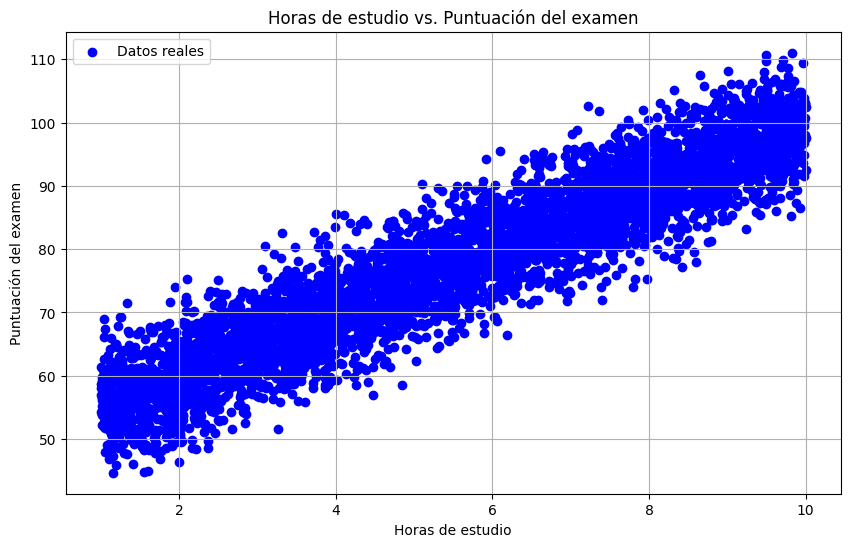

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST
from sklearn.model_selection import train_test_split
# A COMPLETAR
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [5]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    # A COMPLETAR
  cost = ((y_true - y_pred) ** 2).mean()
  return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # A COMPLETAR
  train_loss_per_epoch = []
  val_loss_per_epoch = []
    # 1. Inicializar los coeficientes (pesos) w y b
  w = np.random.rand()
  b = np.random.rand()
    # 2. bucle que itere por epoch
  for _ in range(epochs):

    # 3. Calcular y_pred del conjunto de entrenamiento por epoch
    y_pred_train = np.dot(X_train, w) + b
    # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
    train_loss = cost_function(y_train, y_pred_train)
    train_loss_per_epoch.append(train_loss)
    # 5. Calcular los gradientes para los pesos w y b
        # gradiente de b es la derivada de la función de coste con respecto a b: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]
    b_gradient = (-2 / len(y_train)) * np.sum(y_train - y_pred_train)
        # gradiente de w es la derivada de la función de coste con respecto a w: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]
    w_gradient = (-2 / len(y_train)) * np.dot(X_train.T, (y_train - y_pred_train ))
    # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
    b = b - lr * b_gradient
    w = w - lr * w_gradient
    # 7. Calcular y_pred del conjunto de validación por epoch
    y_pred_val = np.dot(X_val, w) + b
    # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
    val_loss = cost_function(y_val, y_pred_val)
    val_loss_per_epoch.append(val_loss)
  return w, b, train_loss_per_epoch, val_loss_per_epoch

In [6]:
# Hiperparámetros
lr = 0.01 # A COMPLETAR
epochs = 100 # A COMPLETAR

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

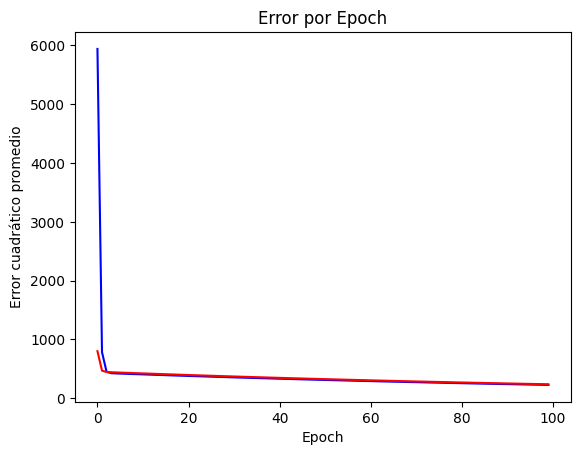

In [7]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 237.9929713365066


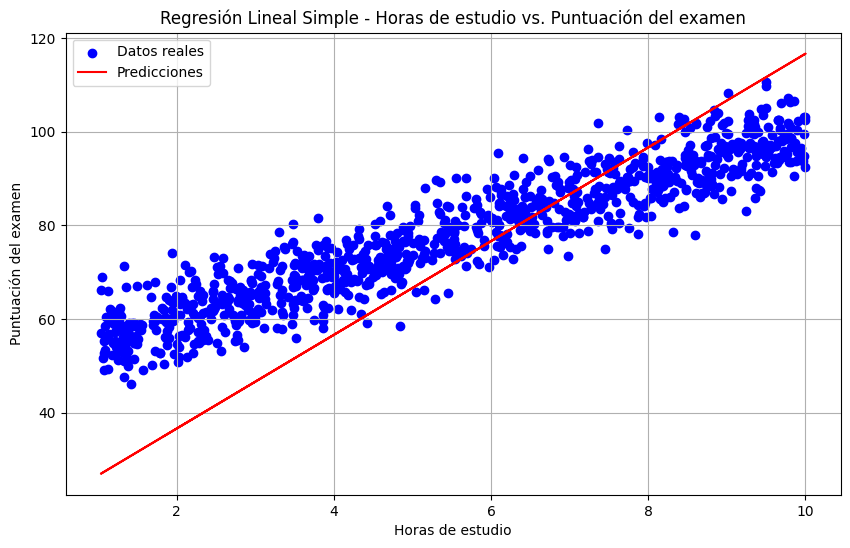

In [8]:
# Realizar predicciones en test
y_pred = (X_test * w) + b # A COMPLETAR

# Calcular el costo
cost = cost_function(y_test, y_pred) # A COMPLETAR

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
mse = mean_squared_error(y_test, y_pred) # A COMPLETAR
mae = mean_absolute_error(y_test, y_pred) # A COMPLETAR
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) # A COMPLETAR

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 237.9929713365066
MAE en el conjunto de test: 13.013282411091488
R^2 en el conjunto de test: -0.19402169225566723
MAPE en el conjunto de test: 0.18345433139671805


## Implementación de la regresión lineal usando sklearn

In [10]:
# Crear el modelo de regresión lineal con sklearn
# A COMPLETAR
from sklearn.linear_model import LinearRegression
# Entrenar el modelo con los datos de entrenamiento
# A COMPLETAR
X_train = X_train.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Costo del modelo: 25.249637383330832


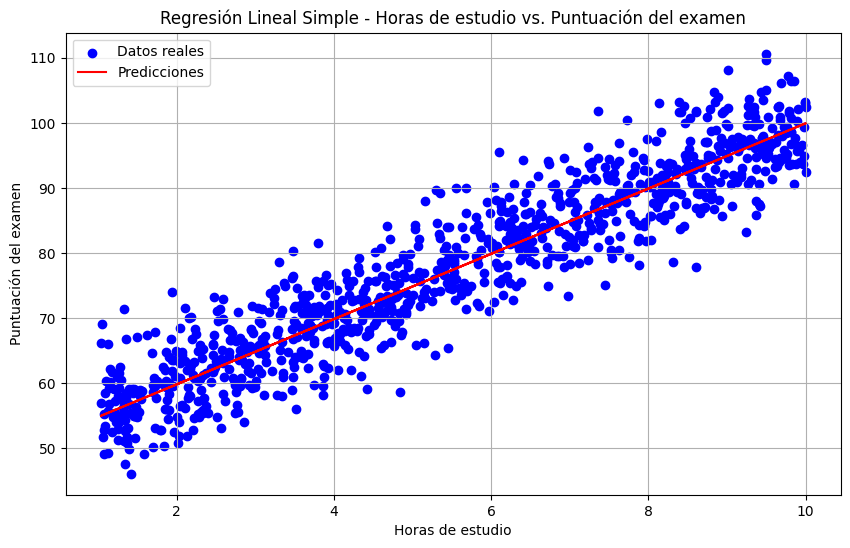

In [11]:
# Realizar predicciones en test
X_test = X_test.reshape(-1, 1)
y_pred = reg.predict(X_test) # A COMPLETAR

# Calcular el costo
cost = mean_squared_error(y_test, y_pred) # A COMPLETAR

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred) # A COMPLETAR
mae = mean_absolute_error(y_test, y_pred) # A COMPLETAR
r2 = r2_score(y_test, y_pred) # A COMPLETAR
mape = mean_absolute_percentage_error(y_test, y_pred) # A COMPLETAR

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 25.249637383330832
MAE en el conjunto de entrenamiento: 3.9544897494040634
R^2 en el conjunto de entrenamiento: 0.8733214069811396
MAPE en el conjunto de entrenamiento: 0.05257659436831548


## Comparación de parámetros obtenidos

In [13]:
b_sklearn = reg.intercept_
w_sklearn = reg.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 16.63554383537366
Coeficiente de pendiente (w) - Manual: 10.00076385218965
Coeficiente de intercepción (b) - Scikit-learn: 49.793769346749855
Coeficiente de pendiente (w) - Scikit-learn: 5.01401554246229


### CONCLUSIONES

En este caso se ha implementado la regresión lineal de dos formas: manual (utilizando el descenso del gradiente) y automática (haciendo uso de librerías ya optimizadas como es Sci-Kit-Learn).

En el primero de los casos (manual), los parámetros como el lr o las epochs necesarias han sido establecidas de forma manual, dando como resultado una gráfica cuyos resultados no se ajustan del todo a la linea de regresión. Se ha probado también el subir en número de epochs y el resultado del mismo ha sido satisfactorio, ajustándose de forma correcta los puntos a las lineas.

Por otra parte, con la ejecución de la regresión lineal de Sci-Kit-Learn (librería automatizada y optimizada) los resultados han sido satisfactorios desde el primer momento en el conjunto de test, por lo que la utilización de esta es mucho más precisa a la hora de imprimir los resultados.